# 功效分析
功效分析 power analysis 可以帮助在给定置信度的情况下，判断检测到给定效应值时所需的样本量  
它也可以帮助你在给定置信度水平情况下，计算在某样本量内能检测到给定效应值的概率  
pwr模块可以实现功效分析  对于每个函数，用户可以设定四个量样本大小、显著性水平、功效和效应值中的三个量，第四个量将由软件计算出来  
功效通过1减去II型错误的概率来定义。我们可以把它看做是真实效应发生的概率  
效应值指的是在备择或研究假设下效应的量。效应值的表达式依赖于假设检验中使用的统计方法。  

In [6]:
library('pwr')
# 你根据过去的经验知道反应时间有1.25 s的标准偏差，并认定反应时间1 s的差值是巨大的差异，
# 那么在这个研究中，可设定要检测的效应值为d=1/1.25=0.8或者更大。
# 另外，如果差异存在，你希望有90%的把握检测到它，由于随机变异性的存在，你也希望有95%的把握不会误报差异显著。
# 这时，对于该研究需要多少受试者呢？
pwr.t.test(d=0.8,sig.level=0.05,power=0.9,type="two.sample",alternative="two.sided")
# 需要两组,每组34个测试者


     Two-sample t test power calculation 

              n = 33.82555
              d = 0.8
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number in *each* group


In [7]:
# 现对五个组做单因素方差分析，要达到0.8的功效，效应值为0.25，
# 并选择0.05的显著性水平，计算各组需要的样本大小
pwr.anova.test(k=5,f=0.25,sig.level=0.05,power=0.8)
# 总样本大小为5 × 39 = 195


     Balanced one-way analysis of variance power calculation 

              k = 5
              n = 39.1534
              f = 0.25
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group


- 相关性
- 线性模型
- 比例检验
- 卡方检验

# 重抽样和自助法

In [8]:
# 独立两样本检验
library(coin)
score <- c(40,57,45,55,58,57,64,55,62,65)
treatment <- factor(c(rep("a",5),rep("B",5)))
mydata <- data.frame(treatment,score)
mydata

treatment,score
a,40
a,57
a,45
a,55
a,58
B,57
B,64
B,55
B,62
B,65


In [9]:
# 传统t检验
t.test(score~treatment,data=mydata,var.equal=TRUE)


	Two Sample t-test

data:  score by treatment
t = -2.345, df = 8, p-value = 0.04705
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -19.0405455  -0.1594545
sample estimates:
mean in group a mean in group B 
           51.0            60.6 


In [10]:
# 置换检验
oneway_test(score~treatment,data=mydata,distribution="exact")


	Exact Two-Sample Fisher-Pitman Permutation Test

data:  score by treatment (a, B)
Z = -1.9147, p-value = 0.07143
alternative hypothesis: true mu is not equal to 0


In [13]:
# 用置换检验判断两类别变量的独立性
library(coin)
library(vcd)
Arthritis <- transform(Arthritis, Improved=as.factor(as.numeric(Improved)))
set.seed(1234)
chisq_test(Treatment~Improved, data=Arthritis,distribution=approximate(B=9999))


	Approximative Pearson Chi-Squared Test

data:  Treatment by Improved (1, 2, 3)
chi-squared = 13.055, p-value = 0.0018


1. 数值变量间的独立性
2. 两样本和K样本相关性检验
3. lmPerm包
4. 自助法
5. boot包的自助法

# 主成分和因子分析

In [23]:
library(psych)
head(USJudgeRatings)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8
"BURNS,E.B.",6.2,8.8,8.7,8.5,7.9,8.0,8.1,8.0,8.0,8.0,8.6,8.6


The estimated weights for the factor scores are probably incorrect.  Try a different factor extraction method.


Parallel analysis suggests that the number of factors =  NA  and the number of components =  1 


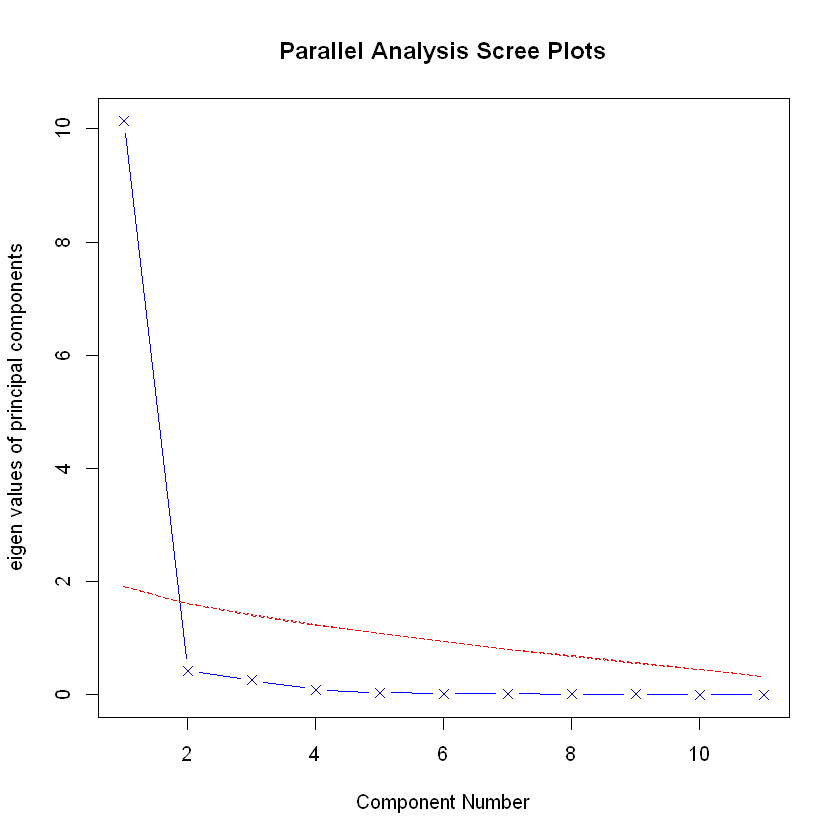

In [22]:
# 判断主成分的个数
fa.parallel(USJudgeRatings[,-1], fa="pc", 
            n.iter=100, show.legend=FALSE)

In [26]:
# 提取主成分 
pc <- principal(USJudgeRatings[,-1], nfactors = 1)
pc
# PC1栏包含了成分载荷，指观测变量与主成分的相关系数
# 如果提取不止一个主成分，那么还将会有PC2、PC3等栏
# h2栏指成分公因子方差——主成分对每个变量的方差解释度
# u2栏指成分唯一性——方无法被主成分解释的比例（1-h2）

Principal Components Analysis
Call: principal(r = USJudgeRatings[, -1], nfactors = 1)
Standardized loadings (pattern matrix) based upon correlation matrix
      PC1   h2     u2 com
INTG 0.92 0.84 0.1565   1
DMNR 0.91 0.83 0.1663   1
DILG 0.97 0.94 0.0613   1
CFMG 0.96 0.93 0.0720   1
DECI 0.96 0.92 0.0763   1
PREP 0.98 0.97 0.0299   1
FAMI 0.98 0.95 0.0469   1
ORAL 1.00 0.99 0.0091   1
WRIT 0.99 0.98 0.0196   1
PHYS 0.89 0.80 0.2013   1
RTEN 0.99 0.97 0.0275   1

                 PC1
SS loadings    10.13
Proportion Var  0.92

Mean item complexity =  1
Test of the hypothesis that 1 component is sufficient.

The root mean square of the residuals (RMSR) is  0.04 
 with the empirical chi square  6.21  with prob <  1 

Fit based upon off diagonal values = 1

In [27]:
# 主成分旋转

In [29]:
# 获取主成分得分
pc <- principal(USJudgeRatings[,-1], nfactors = 1, 
                scores = TRUE)
head(pc$scores)

,PC1
"AARONSON,L.H.",-0.1857981
"ALEXANDER,J.M.",0.7469865
"ARMENTANO,A.J.",0.0704772
"BERDON,R.I.",1.1358765
"BRACKEN,J.J.",-2.1586211
"BURNS,E.B.",0.7669406


In [30]:
cor(USJudgeRatings$CONT, pc$scores)

PC1
-0.008815895


In [32]:
# 探索性因子分析 

# 处理缺失数据

In [31]:
# 处理缺失数据的传统方法和现代方法，主要使用VIM和mice包
# 使用用VIM包提供的哺乳动物睡眠数据

In [44]:
0/0
is.nan(0/0)
is.na(0/0)
is.infinite(1/0)

[1] NaN

[1] TRUE

[1] TRUE

[1] TRUE

In [52]:
data(sleep,package="VIM")
head(sleep[complete.cases(sleep),],3)

,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
2,1.00,6.6,6.3,2.0,8.3,4.5,42,3,1,3
5,2547.00,4603.0,2.1,1.8,3.9,69.0,624,3,5,4
6,10.55,179.5,9.1,0.7,9.8,27.0,180,4,4,4


In [53]:
head(!sleep[complete.cases(sleep),],3)

,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [54]:
# 缺失值矩阵
mice::md.pattern(sleep)

,BodyWgt,BrainWgt,Pred,Exp,Danger,Sleep,Span,Gest,Dream,NonD,
42,1,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,0,1,1,1,1
3,1,1,1,1,1,1,1,0,1,1,1
9,1,1,1,1,1,1,1,1,0,0,2
2,1,1,1,1,1,0,1,1,1,0,2
1,1,1,1,1,1,1,0,0,1,1,2
2,1,1,1,1,1,0,1,1,0,0,3
1,1,1,1,1,1,1,0,1,0,0,3
,0,0,0,0,0,4,4,4,12,14,38


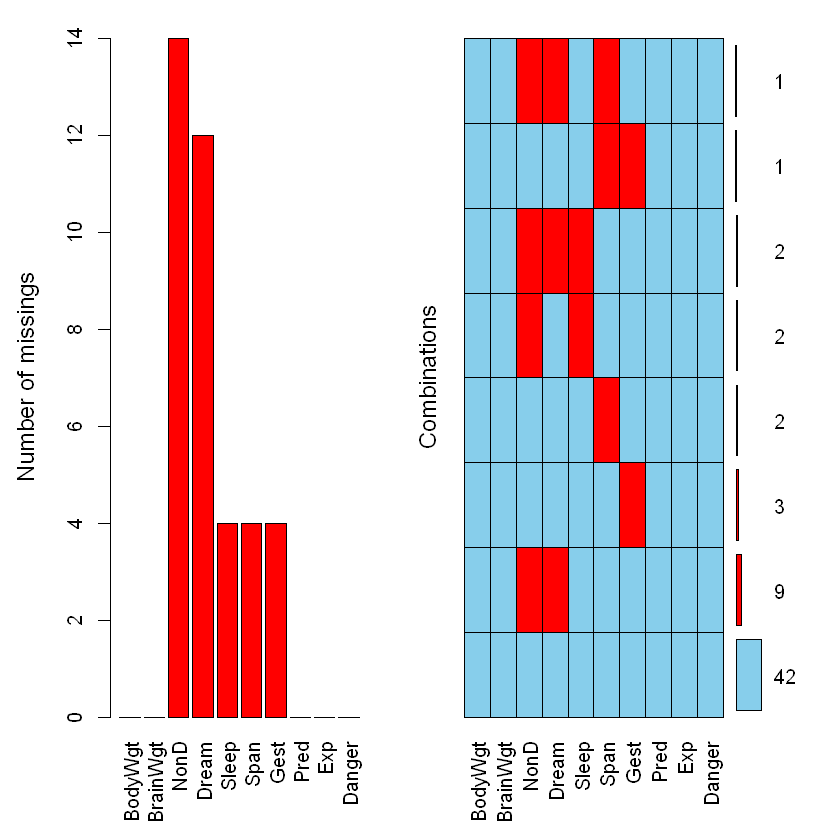

In [56]:
VIM::aggr(sleep, prop=FALSE, numbers=TRUE)

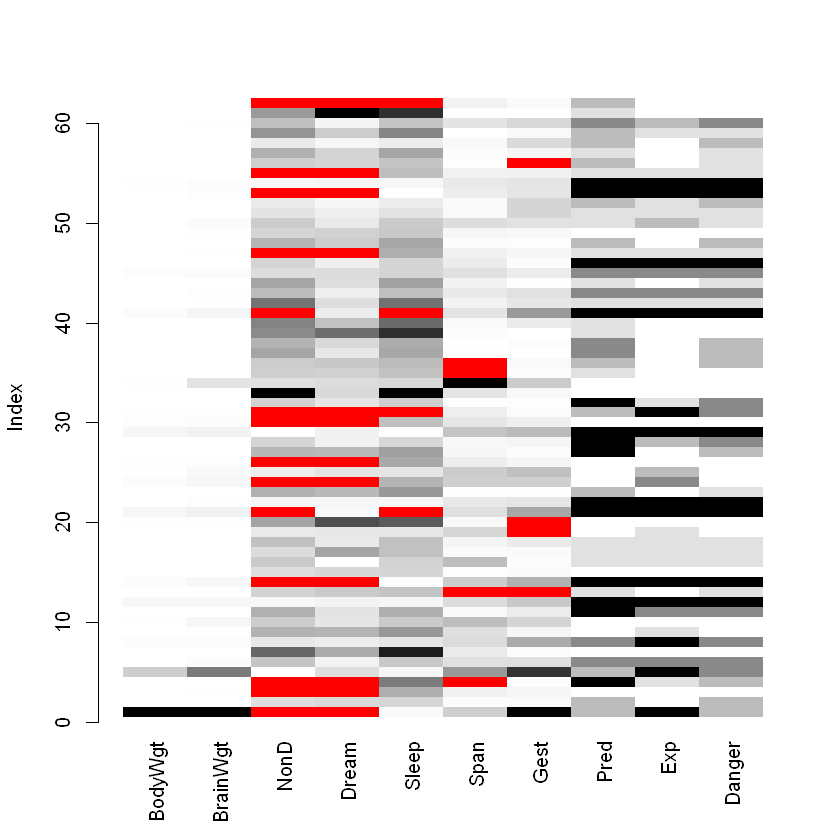

In [58]:
VIM::matrixplot(sleep)

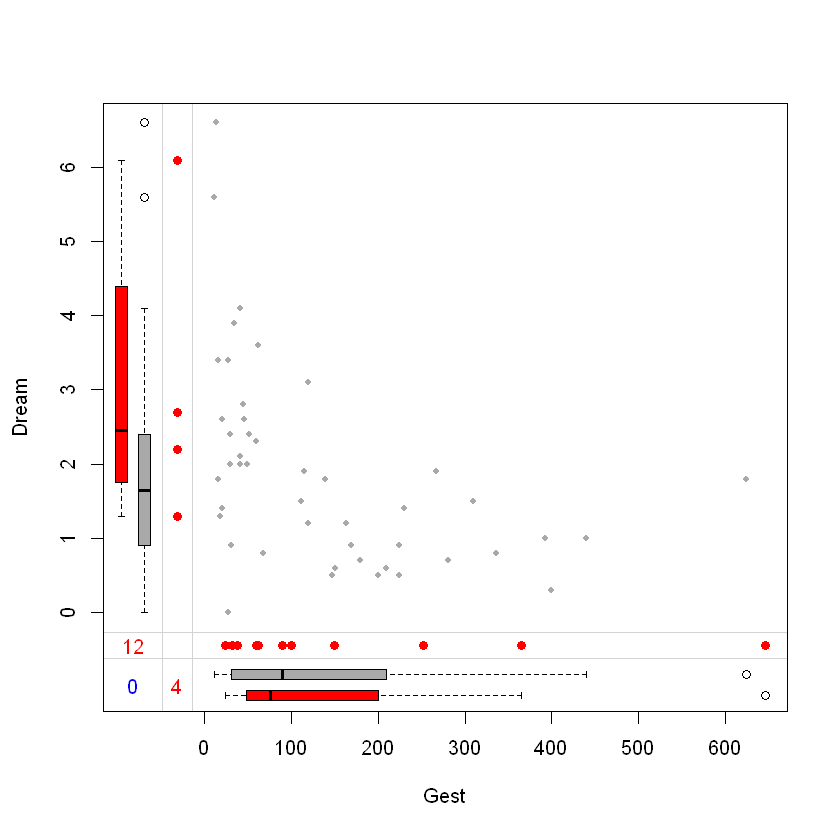

In [60]:
VIM::marginplot(sleep[c("Gest","Dream")], pch=c(20),
               col=c("darkgray", "red", "blue"))

In [160]:
x <- as.data.frame(abs((is.na(sleep))))
head(sleep, 5)

BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
6654.000,5712.0,NA,NA,3.3,38.6,645,3,5,3
1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3
3.385,44.5,NA,NA,12.5,14.0,60,1,1,1
0.920,5.7,NA,NA,16.5,NA,25,5,2,3
2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4


In [161]:
head(x, 5)

BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
0,0,1,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,1,1,0,0,0,0,0,0
0,0,1,1,0,1,0,0,0,0
0,0,0,0,0,0,0,0,0,0


In [177]:
# 原代码报错,但以下代码应该有改进空间
x1 <- apply(x,FUN=as.numeric,2)
x2 <- apply(x1,FUN=sd,1)
x3 <- apply(x1,FUN=sd,2)
y <- x1[which(x2>0),which(x3>0)]
cor(y)

,NonD,Dream,Sleep,Span,Gest
NonD,1.0000000,0.8017837,0.3273268,-0.4909903,-0.7637626
Dream,0.8017837,1.0000000,-0.1020621,-0.3572173,-0.6123724
Sleep,0.3273268,-0.1020621,1.0000000,-0.2500000,-0.2500000
Span,-0.4909903,-0.3572173,-0.2500000,1.0000000,0.0625000
Gest,-0.7637626,-0.6123724,-0.2500000,0.0625000,1.0000000


In [181]:
y1 <- x1[,which(x3>0)]
cor(sleep, y1, use = "pairwise.complete.obs")

Warning message in cor(sleep, y1, use = "pairwise.complete.obs"):
"标准差为零"

,NonD,Dream,Sleep,Span,Gest
BodyWgt,0.22682614,0.22259108,0.001684992,-0.05831706,-0.05396818
BrainWgt,0.17945923,0.16321105,0.007859438,-0.07921370,-0.07332961
NonD,NA,NA,NA,-0.04314514,-0.04553485
Dream,-0.18895206,NA,-0.188952059,0.11699247,0.22774685
Sleep,-0.08023157,-0.08023157,NA,0.09638044,0.03976464
Span,0.08336361,0.05981377,0.005238852,NA,-0.06527277
Gest,0.20239201,0.05140232,0.159701523,-0.17495305,NA
Pred,0.04758438,-0.06834378,0.202462711,0.02313860,-0.20101655
Exp,0.24546836,0.12740768,0.260772984,-0.19291879,-0.19291879
Danger,0.06528387,-0.06724755,0.208883617,-0.06666498,-0.20443928


In [187]:
# 多重插补
library(mice)
imp <- mice(sleep, m=5, seed=1234)


 iter imp variable
  1   1  NonD  Dream  Sleep  Span  Gest
  1   2  NonD  Dream  Sleep  Span  Gest
  1   3  NonD  Dream  Sleep  Span  Gest
  1   4  NonD  Dream  Sleep  Span  Gest
  1   5  NonD  Dream  Sleep  Span  Gest
  2   1  NonD  Dream  Sleep  Span  Gest
  2   2  NonD  Dream  Sleep  Span  Gest
  2   3  NonD  Dream  Sleep  Span  Gest
  2   4  NonD  Dream  Sleep  Span  Gest
  2   5  NonD  Dream  Sleep  Span  Gest
  3   1  NonD  Dream  Sleep  Span  Gest
  3   2  NonD  Dream  Sleep  Span  Gest
  3   3  NonD  Dream  Sleep  Span  Gest
  3   4  NonD  Dream  Sleep  Span  Gest
  3   5  NonD  Dream  Sleep  Span  Gest
  4   1  NonD  Dream  Sleep  Span  Gest
  4   2  NonD  Dream  Sleep  Span  Gest
  4   3  NonD  Dream  Sleep  Span  Gest
  4   4  NonD  Dream  Sleep  Span  Gest
  4   5  NonD  Dream  Sleep  Span  Gest
  5   1  NonD  Dream  Sleep  Span  Gest
  5   2  NonD  Dream  Sleep  Span  Gest
  5   3  NonD  Dream  Sleep  Span  Gest
  5   4  NonD  Dream  Sleep  Span  Gest
  5   5  NonD  Dream

In [190]:
fit <- with(imp, lm(Dream ~ Span + Gest))
pooled <- pool(fit)
summary(pooled)

,est,se,t,df,Pr(>|t|),lo 95,hi 95,nmis,fmi,lambda
(Intercept),2.546199168,0.254689696,9.997260,52.12563,1.021405e-13,2.035156222,3.0572421151,NA,0.08710301,0.05273554
Span,-0.004548904,0.012039106,-0.377844,51.94538,7.070861e-01,-0.028707741,0.0196099340,4,0.08860195,0.05417409
Gest,-0.003916211,0.001468788,-2.666287,55.55683,1.002562e-02,-0.006859066,-0.0009733567,4,0.05442170,0.02098354


In [192]:
imp$imp$Dream

,1,2,3,4,5
1,1.0,0.5,0.5,0.5,0.3
3,2.6,2.1,1.5,1.8,1.3
4,3.4,3.1,3.4,1.2,3.4
14,0.3,0.5,0.5,0.3,1.2
24,1.8,1.3,3.6,0.9,5.6
26,2.3,3.1,2.0,2.6,2.1
30,1.2,0.3,3.4,2.6,2.3
31,3.4,0.5,0.6,1.0,0.5
47,0.5,1.5,1.5,2.2,3.4
53,0.3,0.5,0.5,0.5,0.6


In [195]:
dataset3 <- complete(imp,action=3)
head(dataset3)

BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
6654.000,5712.0,2.1,0.5,3.3,38.6,645,3,5,3
1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3
3.385,44.5,11.0,1.5,12.5,14.0,60,1,1,1
0.920,5.7,13.2,3.4,16.5,2.0,25,5,2,3
2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4
10.550,179.5,9.1,0.7,9.8,27.0,180,4,4,4
